In [1]:
from datasets import multi_coin_ds
from models import  init
import keras_cv
import keras
import tensorflow as tf

init()

# Load dataset
train = multi_coin_ds([
    ('./datasets/90/annotations.xml', 'PNG'),
    ('./datasets/60/annotations.xml', 'PNG'),
    ('./datasets/30/annotations.xml', 'PNG'),
    ('./datasets/090/annotations.xml', 'PNG'),
    ('./datasets/190/annotations.xml', 'PNG'),
], visibility=['clear'], normalise=False ,format='xywh', d_img=False, d_bb=False, tsz=(1024, 1024))


def augment(img,label):
    tf.image.random_contrast(img, lower=0.4, upper=0.6)
    tf.image.random_brightness(img, max_delta=0.2)
    tf.image.random_saturation(img, lower=0.4, upper=0.6)

    return img, label

# train = train.map(augment)

val = multi_coin_ds([
    ('./datasets/clear1/annotations.xml', None),
    ('./datasets/clear2/annotations.xml', None),
], visibility=['clear'], normalise=False, format='xywh', d_img=False, d_bb=False, tsz=(1024, 1024))


2025-08-06 05:05:33.201257: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-06 05:05:33.215508: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754453133.224435  564549 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754453133.227224  564549 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754453133.234563  564549 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Memory growth enabled for GPU(s)


I0000 00:00:1754453158.188120  564549 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 825 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [2]:
backbone = keras_cv.models.YOLOV8Backbone.from_preset(
    "yolo_v8_l_backbone_coco",
    load_weights=True
)

yolo = keras_cv.models.YOLOV8Detector(
    num_classes=1,
    bounding_box_format="xywh",
    backbone=backbone,
    fpn_depth=3,
    prediction_decoder=keras_cv.layers.NonMaxSuppression(
        bounding_box_format="xywh",
        from_logits=False,
        iou_threshold=0.5,
        confidence_threshold=0.5,
        max_detections=5
    )
)

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    global_clipnorm=10.0,
)

yolo.compile(
    optimizer=optimizer, classification_loss="binary_crossentropy", box_loss="ciou"
)

In [4]:
history = yolo.fit(train.batch(2), validation_data=val.batch(1), epochs=100)

Epoch 1/100


2025-08-06 05:08:14.170397: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 168.01MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-08-06 05:08:14.229629: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 176.01MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-08-06 05:08:14.229687: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 176.01MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-08-06 05:08:14.229701: W external/local_xla/

UnknownError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/usr/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/usr/lib/python3.12/asyncio/base_events.py", line 1987, in _run_once

  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 397, in dispatch_shell

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 368, in execute_request

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 752, in execute_request

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 455, in do_execute

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 577, in run_cell

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3116, in run_cell

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3171, in _run_cell

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3394, in run_cell_async

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3639, in run_ast_nodes

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3699, in run_code

  File "/tmp/ipykernel_564549/1206364036.py", line 1, in <module>

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 377, in fit

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 220, in function

  File "/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 133, in multi_step_on_iterator

Failed to determine best cudnn convolution algorithm for:
%cudnn-conv.244 = (f32[2,320,256,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[2,128,256,256]{3,2,1,0} %bitcast.96434, f32[320,128,1,1]{3,2,1,0} %bitcast.95204), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", metadata={op_type="Conv2DBackpropInput" op_name="gradient_tape/yolov8_detector_1/functional_1/stack1_c2f_output_conv_1/convolution/Conv2DBackpropInput" source_file="/mnt/c/Users/n3/Desktop/od-eval/.linuxvnev/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}

Original error: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 184549376 bytes. [tf-allocator-allocation-error='']

To ignore this failure and try to use a fallback algorithm (which may have suboptimal performance), use XLA_FLAGS=--xla_gpu_strict_conv_algorithm_picker=false.  Please also file a bug for the root cause of failing autotuning.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_74156]

In [2]:
backbone = keras_cv.models.YOLOV8Backbone.from_preset(
    "yolo_v8_s_backbone_coco",
    include_rescaling=True
)
backbone.trainable = False



model = keras_cv.models.YOLOV8Detector(
    num_classes=1,
    bounding_box_format="xywh",
    backbone=backbone,
    fpn_depth=2  # You can adjust this based on your needs
)

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.937),
    classification_loss=keras_cv.losses.FocalLoss(
        from_logits=True,
        alpha=0.25,
        gamma=2.0,
    ),
    box_loss=keras_cv.losses.CIoULoss(bounding_box_format="xywh")
)

model.fit(train.batch(2), validation_data=val.batch(1), epochs=25)

Epoch 1/25


I0000 00:00:1754451493.847892  541475 service.cc:152] XLA service 0x7ae180025010 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754451493.847924  541475 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-08-06 04:38:14.146612: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1754451495.082781  541475 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-08-06 04:38:16.372839: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-06 04:38:16.481438: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup e

65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - box_loss: 1.7546e-06 - class_loss: 0.1345 - loss: 0.1345

2025-08-06 04:38:50.779339: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-06 04:38:50.882232: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-06 04:38:50.980069: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-06 04:39:03.787944: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_add_multiply_reduce_subtract_fusion_1', 4 bytes spill stores, 4 bytes spill loads



66/66 ━━━━━━━━━━━━━━━━━━━━ 65s 584ms/step - box_loss: 8.9938e-07 - class_loss: 0.1201 - loss: 0.1203 - val_box_loss: 2.9176e-06 - val_class_loss: 0.0985 - val_loss: 0.0985
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 277ms/step - box_loss: 7.5478e-07 - class_loss: 0.0905 - loss: 0.0905 - val_box_loss: 2.5532e-06 - val_class_loss: 0.0830 - val_loss: 0.0830
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 308ms/step - box_loss: 7.4010e-07 - class_loss: 0.0828 - loss: 0.0829 - val_box_loss: 2.3655e-06 - val_class_loss: 0.0811 - val_loss: 0.0811
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 337ms/step - box_loss: 7.0229e-07 - class_loss: 0.0793 - loss: 0.0793 - val_box_loss: 2.1119e-06 - val_class_loss: 0.0778 - val_loss: 0.0778
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 300ms/step - box_loss: 6.7972e-07 - class_loss: 0.0768 - loss: 0.0768 - val_box_loss: 2.0023e-06 - val_class_loss: 0.0759 - val_loss: 0.0759
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 367ms/step - box_loss: 6.7459e-07 - class_loss: 0.0752

In [3]:
from datasets import get_real_samples

it = iter(get_real_samples(val))

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
{'boxes': array([[[ 9.10420105e+02, -4.06709976e+01,  1.01325867e+02,
          1.04284019e+02],
        [ 9.51521423e+02, -1.76033821e+01,  6.19001465e+01,
          8.19364471e+01],
        [ 9.69742798e+02, -8.88223648e-01,  5.87232666e+01,
          8.16581421e+01],
        [ 9.00160828e+02, -2.18957138e+01,  1.44571838e+02,
          9.01615143e+01],
        [ 9.72852722e+02, -6.68943253e+01,  5.54786987e+01,
          1.49916077e+02],
        [ 9.22713013e+02, -8.31784744e+01,  8.51412964e+01,
          1.86453522e+02],
        [ 9.40669373e+02, -6.08727875e+01,  1.21837830e+02,
          1.51767059e+02],
        [ 9.64095215e+02, -3.34156494e+01,  5.07641602e+01,
          1.38544495e+02],
        [ 9.51707642e+02, -7.63908463e+01,  6.84954224e+01,
          1.76714264e+02],
        [ 9.85451782e+02, -2.53071022e+01,  4.25986328e+01,
          1.16729828e+02],
        [ 9.34485718e+02, -1.32663345e+01,  1.02754639e+02,
          1.09798424e+02

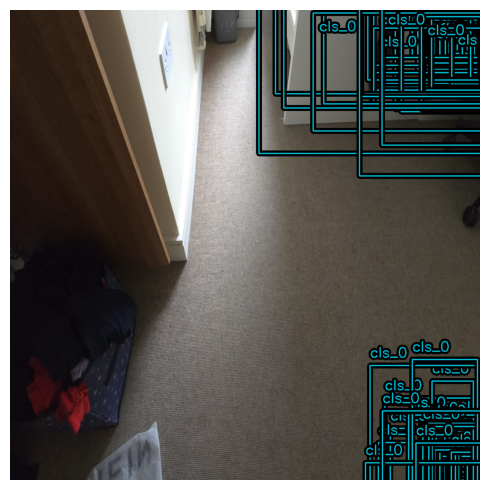

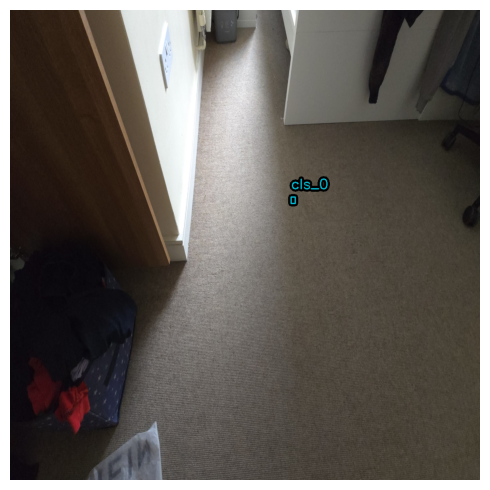

In [4]:
from debugging import visualise_bundle
import numpy as np

img, boxes, classes = next(it)

y = model.predict(np.expand_dims(img, axis=0))

print(y)
visualise_bundle(
    (img.numpy() * 255).astype(np.uint8),
    y['boxes'][0],
    y['classes'][0]
)
print("confidence of ", np.max(y['confidence']))

visualise_bundle(
    (img.numpy() * 255).astype(np.uint8),
    boxes,
    classes
)